### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения

##### Студент:  Матюхин Григорий Васильевич
##### Группа:   НПИбд-01-21

## Москва 2024
***

### Вариант №7
1. Набор данных `oxford_iiit_pet` с изменением разрешения до 60x80 
2. Классы с метками 10,12,21,32,35 
3. Требования к архитектуре сети MLP: 
    - Последовательный API со списком слоев при создании 
    - Функция потерь: категориальная кросс-энтропия 
    - Кол-во скрытых слоев 4 
    - Кол-во нейронов 30 в первом скрытом слое, увеличивающееся на 20 с каждым последующим скрытым слоем 
    - Использование слоев с регуляризацией L1 
4. Требования к архитектуре сети CNN: 
    - Последовательный API с методом add() при создании 
    - Функция потерь: разреженная категориальная кросс-энтропия 
    - Кол-во слоев пулинга 4 
    - Количество фильтров в сверточных слоях 8 
    - Размеры фильтра 4х4 
    - Использование слоев пакетной нормализации 
5. Требования к архитектуре сети RNN: 
    - Функциональный API при создании 
    - Функция потерь: категориальная кросс-энтропия 
    - Слой LSTM со 128 нейронами 
    - Использование слоев dropout 
6. Показатель качества многоклассовой классификации: 
    - минимальная точность классов, где точность (precision) класса равна доле правильных предсказаний для всех точек, относимых классификатором к этому классу. 

# Выполнение

## 1. Загружаем датасет

In [1]:
import tensorflow_datasets as tfds
import pandas as pd

In [2]:
ds_train, ds_test = tfds.load("oxford_iiit_pet", split=["train", "test"])
df_train = tfds.as_dataframe(ds_train)
df_test = tfds.as_dataframe(ds_test)
print(len(df_train), len(df_test))
df_train.head()

2024-05-24 00:11:13.887798: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 00:11:13.891218: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 00:11:13.940275: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 00:11:14.892348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
2024-05-24 00:11:16.906738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-24 00:1

3680 3669


,file_name,image,label,segmentation_mask,species
0,b'Sphynx_158.jpg',"[[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
1,b'english_cocker_spaniel_135.jpg',"[[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...",12,"[[[3], [3], [3], [3], [3], [3], [3], [3], [3],...",1
2,b'British_Shorthair_181.jpg',"[[[44, 32, 6], [44, 34, 7], [44, 34, 7], [41, ...",9,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
3,b'Siamese_161.jpg',"[[[108, 130, 117], [114, 133, 127], [108, 128,...",32,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
4,b'Sphynx_178.jpg',"[[[237, 228, 91], [236, 228, 93], [230, 225, 8...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0


In [3]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [4]:
rng_state = 1

In [5]:
def sample_images(n, random_state):
    for i in df_train.sample(n=n, random_state=random_state)["image"]:
        img = Image.fromarray(i)
        plt.figure()
        plt.imshow(img)

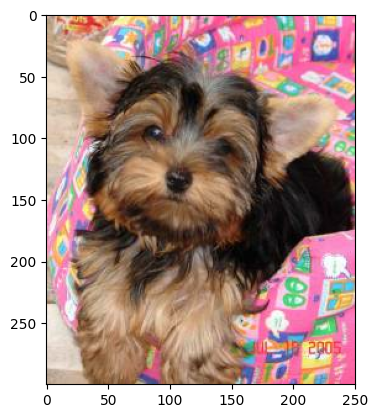

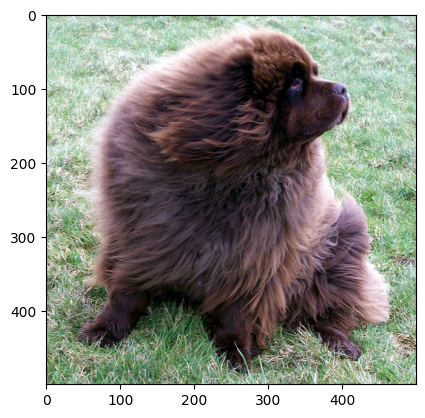

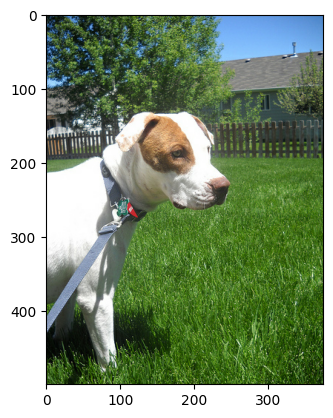

In [6]:
sample_images(3, rng_state)

Изменим размер изображений на 60x80

In [7]:
import numpy as np

In [8]:
def resize(img):
    img = Image.fromarray(img)
    img = img.resize((60, 80))
    return np.asarray(img, np.uint8)

In [9]:
df_train["image"] = df_train["image"].map(resize)
df_test["image"] = df_test["image"].map(resize)

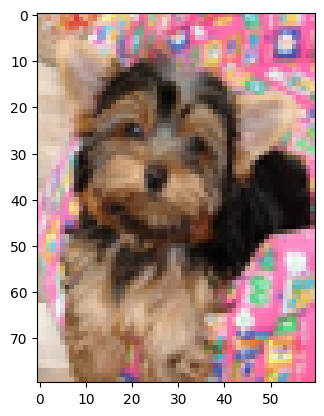

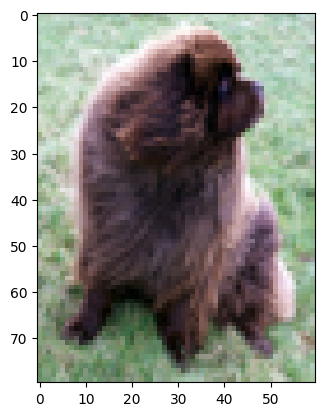

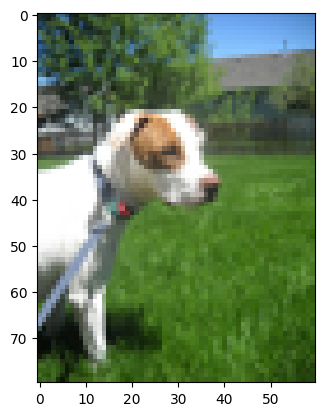

In [10]:
sample_images(3, rng_state)

## 2. Подготовка данных

In [11]:
df_train.drop(columns=["file_name", "segmentation_mask", "species"], inplace=True)
df_test.drop(columns=["file_name", "segmentation_mask", "species"], inplace=True)
df_train.head()

,image,label
0,"[[[5, 4, 3], [5, 5, 4], [5, 5, 4], [4, 4, 3], ...",33
1,"[[[16, 27, 10], [7, 15, 5], [4, 11, 3], [4, 13...",12
2,"[[[43, 34, 6], [40, 31, 6], [41, 32, 6], [44, ...",9
3,"[[[100, 122, 111], [97, 120, 108], [99, 122, 1...",32
4,"[[[232, 224, 87], [216, 208, 81], [218, 209, 7...",33


In [12]:
np.unique(np.asarray(df_train["label"]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [13]:
CLASSES = [10, 12, 21, 32, 35]
df_train = df_train[df_train["label"].isin(CLASSES)]
df_test = df_test[df_test["label"].isin(CLASSES)]
print(len(df_train), len(df_test))
df_train.head()

495 500


,image,label
1,"[[[16, 27, 10], [7, 15, 5], [4, 11, 3], [4, 13...",12
3,"[[[100, 122, 111], [97, 120, 108], [99, 122, 1...",32
12,"[[[238, 199, 41], [232, 195, 56], [233, 196, 4...",32
13,"[[[3, 7, 6], [14, 20, 18], [10, 21, 17], [4, 1...",10
17,"[[[13, 23, 11], [13, 18, 11], [9, 11, 7], [12,...",12


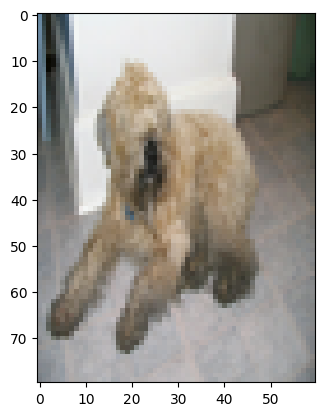

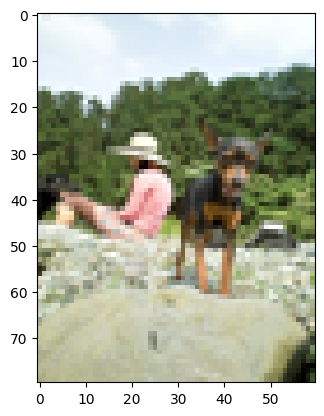

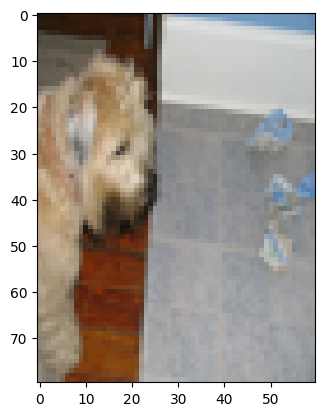

In [14]:
sample_images(3, rng_state)

Переводим значение пикселей в диапазон $\left[0;1\right]$

In [15]:
def scale(img):
    return img / 255

In [16]:
df_train["image"] = df_train["image"].map(scale)
df_test["image"] = df_test["image"].map(scale)
df_train.head()

/tmp/ipykernel_1843342/679964910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["image"] = df_train["image"].map(scale)
/tmp/ipykernel_1843342/679964910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["image"] = df_test["image"].map(scale)


,image,label
1,"[[[0.06274509803921569, 0.10588235294117647, 0...",12
3,"[[[0.39215686274509803, 0.47843137254901963, 0...",32
12,"[[[0.9333333333333333, 0.7803921568627451, 0.1...",32
13,"[[[0.011764705882352941, 0.027450980392156862,...",10
17,"[[[0.050980392156862744, 0.09019607843137255, ...",12


Меняем метки, чтобы они шли подряд от 0 до 4

In [17]:
CLS = list(range(len(CLASSES)))

In [18]:
df_train["label"] = df_train["label"].map(lambda x: CLS[CLASSES.index(x)])
df_test["label"] = df_test["label"].map(lambda x: CLS[CLASSES.index(x)])
print(len(df_train), len(df_test))
np.unique(np.asarray(df_train["label"]))

495 500


/tmp/ipykernel_1843342/1256891082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["label"] = df_train["label"].map(lambda x: CLS[CLASSES.index(x)])
/tmp/ipykernel_1843342/1256891082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["label"] = df_test["label"].map(lambda x: CLS[CLASSES.index(x)])


array([0, 1, 2, 3, 4])

In [19]:
input_shape = df_train.iloc[0]["image"].shape
input_shape

(80, 60, 3)

In [20]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(pd.DataFrame(df_train, columns=["label"]), num_classes=len(CLASSES))
test_labels = to_categorical(pd.DataFrame(df_test, columns=["label"]), num_classes=len(CLASSES))
train_labels.shape, test_labels.shape

((495, 5), (500, 5))

In [21]:
train_images = np.zeros(shape=(df_train.shape[0],*input_shape), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],*input_shape), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = df_train.iloc[idx]['image']

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = df_test.iloc[idx]['image']

train_images.shape, test_images.shape

((495, 80, 60, 3), (500, 80, 60, 3))

## 3. Нейронные сети

Общий callback

In [22]:
import tensorflow as tf

In [23]:
early_stop_delay = 20
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    start_from_epoch=early_stop_delay,
    verbose=1
)

### 3.1 MLP

In [24]:
tf.random.set_seed(rng_state)
dropout_rate = 0.3
l1 = 0.02

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation="relu", kernel_regularizer=tf.keras.regularizers.L1(l1=l1)),
    tf.keras.layers.Dense(50, activation="relu", kernel_regularizer=tf.keras.regularizers.L1(l1=l1)),
    tf.keras.layers.Dropout(rate=dropout_rate),
    tf.keras.layers.Dense(70, activation="relu", kernel_regularizer=tf.keras.regularizers.L1(l1=l1)),
    tf.keras.layers.Dense(90, activation="relu", kernel_regularizer=tf.keras.regularizers.L1(l1=l1)),
    tf.keras.layers.Dense(len(CLASSES), activation="softmax"),
], name="MLP")

mlp.summary()

mlp.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

mlp_hist = mlp.fit(
    train_images,
    train_labels,
    epochs=500,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop],
)

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │       432,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         1,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 70)             │         3,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 90)             │         6,390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,995 (1.69 MB)

 Trainable params: 443,995 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1880 - loss: 65.8603 - val_accuracy: 0.2000 - val_loss: 25.7233
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2251 - loss: 22.3650 - val_accuracy: 0.2000 - val_loss: 16.0782
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1813 - loss: 15.0216 - val_accuracy: 0.2000 - val_loss: 13.1879
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1596 - loss: 13.0090 - val_accuracy: 0.2000 - val_loss: 12.9589
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1942 - loss: 12.6036 - val_accuracy: 0.2000 - val_loss: 12.6355
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1942 - loss: 12.5013 - val_accuracy: 0.2000 - val_loss: 12.1249
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1886 - loss: 12.3769 - val_accuracy: 0.2000 - val_loss: 12.6075
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1886 - loss: 12.4015 - val_accu

### 3.2 CNN

In [25]:
tf.random.set_seed(rng_state)
dropout_rate = 0.3

cnn = tf.keras.Sequential(name="CNN")
layers = [
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="same"),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="same"),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="same"),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=dropout_rate),
    tf.keras.layers.Dense(64, activation="swish"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(CLASSES), activation="softmax")
]

for layer in layers:
    cnn.add(layer)

cnn.summary()

cnn.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

cnn_hist = cnn.fit(
    train_images,
    df_train["label"], # when using sparse cc classes should __not__ be one-hot
    epochs=500,
    validation_data=(test_images, df_test["label"]),
    callbacks=[early_stop],
)

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 80, 60, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 77, 57, 8)      │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 29, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 36, 26, 8)      │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 10, 8)      │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 5, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 2, 8)        │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 1, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24)             │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,777 (22.57 KB)

 Trainable params: 5,595 (21.86 KB)

 Non-trainable params: 182 (728.00 B)

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.2244 - loss: 2.1478 - val_accuracy: 0.2000 - val_loss: 1.6101
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2724 - loss: 1.7770 - val_accuracy: 0.2580 - val_loss: 1.6091
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3500 - loss: 1.5723 - val_accuracy: 0.2680 - val_loss: 1.6075
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3618 - loss: 1.5231 - val_accuracy: 0.2300 - val_loss: 1.6052
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4541 - loss: 1.3544 - val_accuracy: 0.2200 - val_loss: 1.6046
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4534 - loss: 1.3488 - val_accuracy: 0.2500 - val_loss: 1.6036
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4196 - loss: 1.3767 - val_accuracy: 0.2420 - val_loss: 1.6041
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4299 - loss: 1.3032 - val_accuracy: 0.

### 3.3 RNN

In [26]:
train_shape = train_images.shape
test_shape = test_images.shape
rnn_train_images = train_images.reshape(train_shape[0], np.prod(train_shape[1:]))
rnn_test_images = test_images.reshape(test_shape[0], np.prod(test_shape[1:]))
rnn_train_images.shape, rnn_test_images.shape

((495, 14400), (500, 14400))

In [27]:
tf.random.set_seed(rng_state)
dropout_rate = 0.2

inputs = tf.keras.layers.Input(shape=(input_shape))
# x = tf.keras.layers.Reshape((np.prod(input_shape[:2]), input_shape[-1]))(inputs)
# x = tf.keras.layers.Reshape((input_shape[0], np.prod(input_shape[1:])))(inputs)
x = tf.keras.layers.Reshape((1, np.prod(input_shape)))(inputs)
x = tf.keras.layers.LSTM(128, activation="relu")(x)
x = tf.keras.layers.Dropout(rate=dropout_rate)(x)
outputs = tf.keras.layers.Dense(len(CLASSES), activation="softmax")(x)

rnn = tf.keras.Model(inputs=inputs, outputs=outputs, name="RNN")

rnn.summary()

rnn.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"]
)

rnn_hist = rnn.fit(
    train_images,
    train_labels,
    epochs=500,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop],
)

Model: "RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 80, 60, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 14400)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │     7,438,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,439,493 (28.38 MB)

 Trainable params: 7,439,493 (28.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.2351 - loss: 14.5383 - val_accuracy: 0.2040 - val_loss: 2.0341
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2085 - loss: 1.8870 - val_accuracy: 0.2360 - val_loss: 1.6077
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2091 - loss: 1.6695 - val_accuracy: 0.2040 - val_loss: 1.6085
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2600 - loss: 1.6657 - val_accuracy: 0.2200 - val_loss: 1.5994
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2465 - loss: 1.6295 - val_accuracy: 0.2160 - val_loss: 1.6071
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.2932 - loss: 1.6647 - val_accuracy: 0.2120 - val_loss: 1.6076
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2623 - loss: 1.6018 - val_accuracy: 0.2420 - val_loss: 1.6160
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2292 - loss: 1.6058 - val_accuracy: 0

In [28]:
print(f"Model {mlp.name} was trained for {len(mlp_hist.history['loss'])} epochs.")
print(f"Model {cnn.name} was trained for {len(cnn_hist.history['loss'])} epochs.")
print(f"Model {rnn.name} was trained for {len(rnn_hist.history['loss'])} epochs.")

Model MLP was trained for 26 epochs.
Model CNN was trained for 30 epochs.
Model RNN was trained for 35 epochs.


## 4. Оценка качества классификации

In [29]:
from sklearn.metrics import precision_score

best_model = None
best_score = float("-inf")

for model in [mlp, cnn, rnn]:
    pred = model.predict(test_images)
    pred = np.array([[1 if prob > 0.5 else 0 for prob in x] for x in pred])
    score = precision_score(test_labels, pred, average="micro", zero_division=0)
    if score > best_score:
        best_score = score
        best_model = model
    print(f"Precision for model {model.name}: {score}")

print()
print("BEST MODEL:")
best_model.summary()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision for model MLP: 0.0
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Precision for model CNN: 0.4117647058823529
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Precision for model RNN: 0.5294117647058824

BEST MODEL:


Model: "RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 80, 60, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 14400)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │     7,438,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,878,988 (56.76 MB)

 Trainable params: 7,439,493 (28.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,439,495 (28.38 MB)

## 5. Визуализация кривых обучения

In [30]:
def scale_loss(losses):
    return np.asarray(losses) / losses[0]

In [31]:
import matplotlib.pyplot as plt

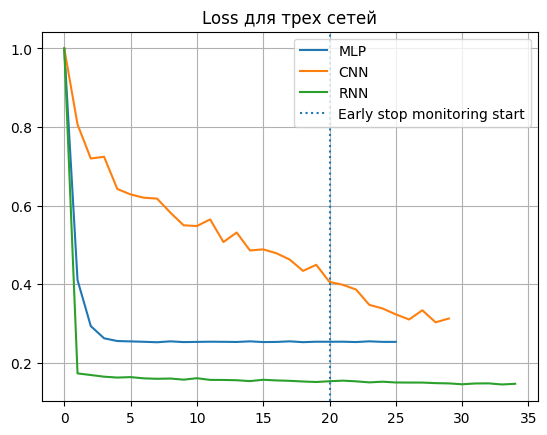

In [32]:
plt.figure()
plt.title("Loss для трех сетей")
plt.plot(scale_loss(mlp_hist.history["loss"]), label="MLP")
plt.plot(scale_loss(cnn_hist.history["loss"]), label="CNN")
plt.plot(scale_loss(rnn_hist.history["loss"]), label="RNN")
plt.axvline(early_stop_delay, linestyle="dotted", label="Early stop monitoring start")
plt.legend()
plt.grid(True)

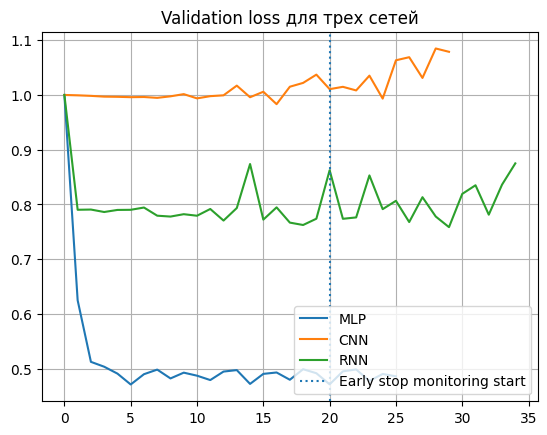

In [33]:
plt.figure()
plt.title("Validation loss для трех сетей")
plt.plot(scale_loss(mlp_hist.history["val_loss"]), label="MLP")
plt.plot(scale_loss(cnn_hist.history["val_loss"]), label="CNN")
plt.plot(scale_loss(rnn_hist.history["val_loss"]), label="RNN")
plt.axvline(early_stop_delay, linestyle="dotted", label="Early stop monitoring start")
plt.legend()
plt.grid(True)

## 6. Визуализация доли верных ответов

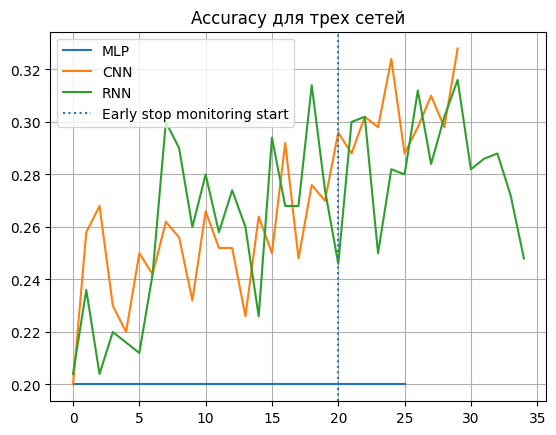

In [34]:
plt.figure()
plt.title("Accuracy для трех сетей")
plt.plot(mlp_hist.history["val_accuracy"], label="MLP")
plt.plot(cnn_hist.history["val_accuracy"], label="CNN")
plt.plot(rnn_hist.history["val_accuracy"], label="RNN")
plt.axvline(early_stop_delay, linestyle="dotted", label="Early stop monitoring start")
plt.legend()
plt.grid(True)

## 7. Изображения c минимальной и максимальной вероятностью правильной классификации

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


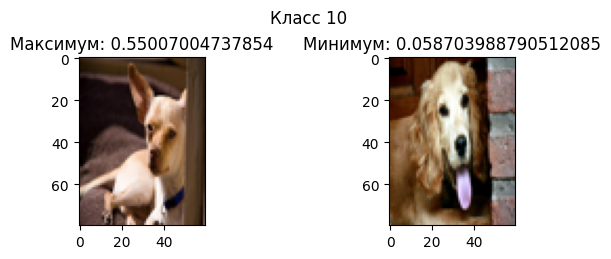

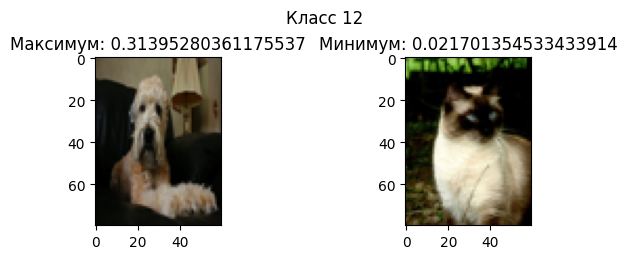

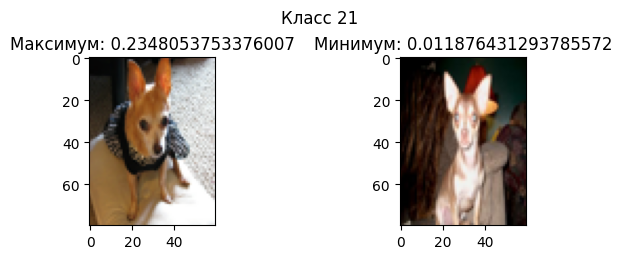

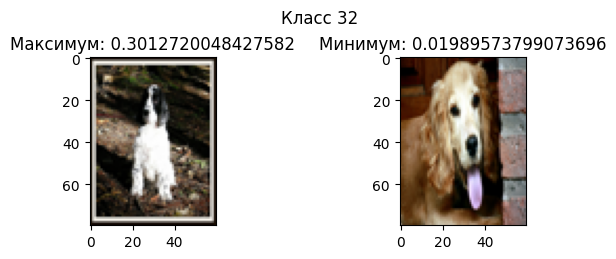

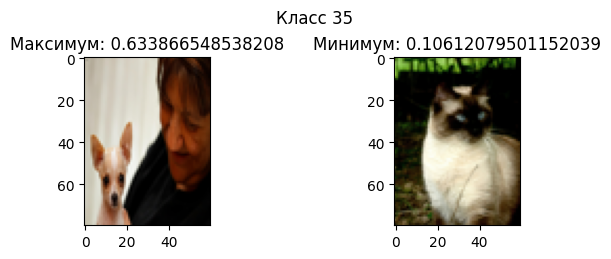

In [36]:
pred = best_model.predict(test_images)
for i in range(len(CLASSES)):
    most_likely = np.argmax(pred[:, i])
    least_likely = np.argmin(pred[:, i])
    most_likely_score = np.max(pred[:, i])
    least_likely_score = np.min(pred[:, i])

    fig = plt.figure()
    fig.suptitle(f"Класс {CLASSES[i]}")
    ax = fig.add_subplot(2, 3, 1)
    ax.set_title(f"Максимум: {most_likely_score}")
    ax.imshow(test_images[most_likely])
    ax = fig.add_subplot(2, 2, 2)
    ax.set_title(f"Минимум: {least_likely_score}")
    ax.imshow(test_images[least_likely])
    plt.show()